## Correlation and AutoCorrelation

**Types of Data**

- Cross Sectional Data
- Panel Data
- **Time Series Data**  Dependent on time
- Pooled Data

Time Series Data: is time dependent.


Funtions used in the Course

- Convert to datetime **pd.to_dataframe(df.cols)**
- Plot the series **df.plot()**
- Slice of the time series **df['2012']**
- Join 2 dfs **df1.join(df2)**
- Resample Data **df = df.resample(rule='W',how='last')**
- Percentage Change of a series **df.cols.pct_change()**
- Diff of a series **df.cols.diff()**
- Correlation between two time series **df.col1.corr(df.col2)**
- Autocorrelation **df.col.autocorr()**

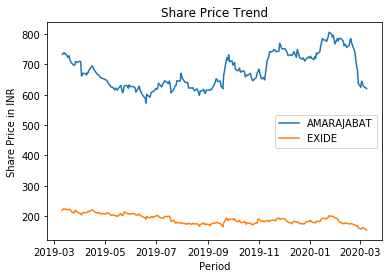

In [1]:
#Imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Getting 2 stock data listed in NSE
amararaja=yf.Ticker('AMARAJABAT.NS')
exide=yf.Ticker('EXIDEIND.NS')

#Getting the close price of the stock as series
amararaja_series = amararaja.history(period='1y').Close
exide_series=exide.history(period='1y').Close

# Visualizing the series
plt.plot(amararaja_series,label='AMARAJABAT')
plt.plot(exide_series,label='EXIDE')
plt.xlabel("Period")
plt.ylabel("Share Price in INR")
plt.title("Share Price Trend")
plt.legend()
plt.show()

Price of the two stocks are at different levels. Lets Check the correlation of the two series

In [2]:
round(amararaja_series.corr(exide_series),4)

-0.0018

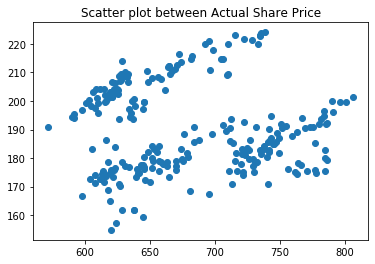

In [3]:
plt.scatter(amararaja_series,exide_series)
plt.title("Scatter plot between Actual Share Price")
plt.show()

Converting the series to percentage change and again check the correlation

In [4]:
amararaja_series_return = amararaja_series.pct_change()
exide_series_return = exide_series.pct_change()

In [5]:
round(amararaja_series_return.corr(exide_series_return),4)

0.6376

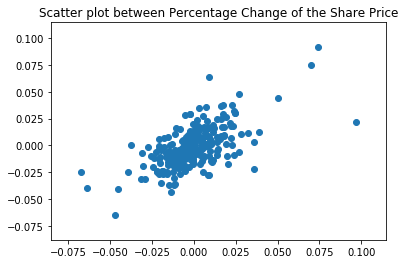

In [6]:
plt.scatter(amararaja_series_return,exide_series_return)
plt.title("Scatter plot between Percentage Change of the Share Price")
plt.show()

**Always compare the time series in their percentage difference**

In [7]:
EXIDE=sm.add_constant(exide_series_return.dropna())

In [8]:
model=sm.OLS(amararaja_series_return[1:],EXIDE).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     163.8
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           6.63e-29
Time:                        20:09:06   Log-Likelihood:                 684.97
No. Observations:                 241   AIC:                            -1366.
Df Residuals:                     239   BIC:                            -1359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.259      0.796      -0.002       0.002
Close          0.6038      0.047     12.797      0.000       0.511       0.697
==============================================================================
Omnibus:                       57.495   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.848
Skew:                           0.778   Prob(JB):                     1.75e-71
Kurtosis:                       8.480   Cond. No.                         51.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
s=exide_series.resample(rule='M',convention='end').mean()

In [11]:
from statsmodels.tsa.api import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [12]:
pacf(exide_series)

array([ 1.        ,  0.95664631,  0.00712565,  0.06016209, -0.01905564,
       -0.08844264,  0.07333619,  0.0668803 , -0.08877542,  0.15293837,
        0.01616907, -0.1264897 , -0.03994053,  0.04523139,  0.05422789,
        0.03393047,  0.05061876,  0.01771401, -0.06291424, -0.04651479,
       -0.02851375,  0.06673813,  0.05903751, -0.06180002, -0.01738159,
       -0.01585114,  0.03527523,  0.09109461,  0.03285969,  0.06668107,
        0.06203515, -0.0912191 , -0.0127746 , -0.02430357, -0.03473198,
        0.10024837,  0.07886129, -0.03862103, -0.01266064, -0.1641935 ,
        0.01923897])

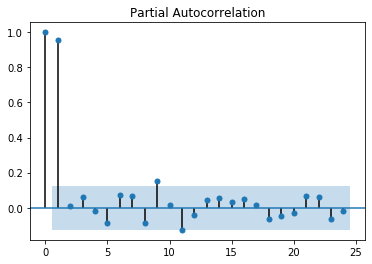

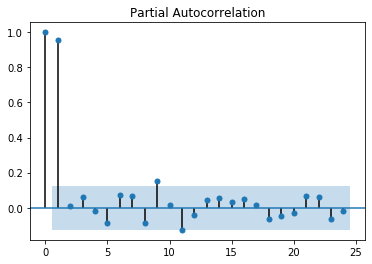

In [13]:
plot_pacf(exide_series)

## Some Simple Time Series


In time series we can try to predict the future of the series based on itself. In order to predict which is influenzing the series going forward we need a measure. So we use the series with the lagged copy of itself and take the correlation. **This is known as Autocorrelation.This is also known as serial correlation**

In [14]:
exide_lag1=exide_series.shift(1)

In [15]:
exide_lag1.dropna(inplace=True)

In [16]:
exide_lag1.shape

(241,)

In [17]:
exide_series.shape

(242,)

In [18]:
exide_series[1:].corr(exide_lag1)

0.9713923425026899

In [19]:
exide_series.autocorr(1)

0.9713923425026899

If the autocorrelation is 

- Positive --> It means its trend/momentum following
- Negative --> Mean Reverting

In [20]:
exide_weekly=exide_series.resample(rule='W',convention='end').mean()
exide_weekly.head()

Date
2019-03-17    222.7660
2019-03-24    220.1975
2019-03-31    215.8575
2019-04-07    208.8860
2019-04-14    213.6460
Freq: W-SUN, Name: Close, dtype: float64

In [21]:
exide_weekly.autocorr(2)

0.8362097580325482

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.api import acf,pacf

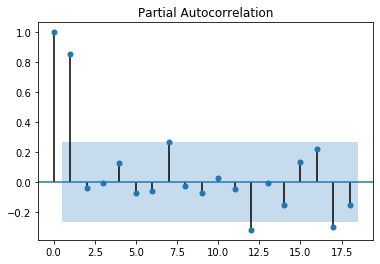

In [23]:
plot_pacf(exide_weekly)
plt.show()

**White Noise**

- Mean zero
- Constant error variance
- No significant Autocorrelation with any of the lags

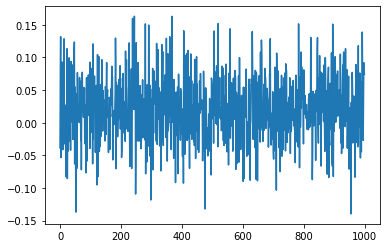

In [24]:
# Simulating white noise
series=np.random.normal(loc=0.02,scale=0.05,size=1000)
plt.plot(series)
plt.show()

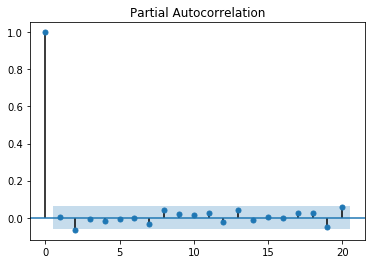

In [25]:
plot_pacf(series,lags=20)
plt.show()

White Noise cant be used to forecast/predict the value.Its simply an error term.

**Random Walk**
$$P_t=P_{t-1}+\epsilon_t$$

Often times Share price can be modelled as white noise

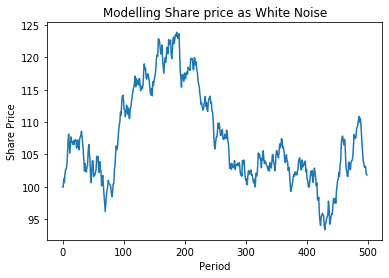

In [27]:
## Modelling Share price as white noise

#Creating a 500 point series
series = np.random.normal(0,1,500)

#Setting the first value to be zero
series[0]=0

#Suppose if the starting price of the share is 100Rs. We add the Cumulative sum to the initial price
Price = 100 + np.cumsum(series)

#Visualizing the Price of the Stock
plt.plot(Price)
plt.title("Modelling Share price as White Noise")
plt.xlabel("Period")
plt.ylabel("Share Price")
plt.show()

## References

1. [Quantstart Blog](https://www.quantstart.com/articles/topic/time-series-analysis/)